In [1]:
#get library ready
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt

In [44]:
#get some random data
data = datasets.load_diabetes()
# this time use datafrom a little bit
df = pd.DataFrame(data['data'],columns = data['feature_names'])
df['targert'] = data['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,targert
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [51]:
# we need to redefined the sex to 0 and 1
def sexchange(x):
    if x>0:
        return 1
    else:
        return 0
df['sex'] = df.apply(lambda row: sexchange(row['sex']),axis = 1)

In [81]:
# now we can split it randomly or analysis them here too
#split

train = df.sample(frac = 0.9)
test = df.drop(train.index)
train_x = train.drop(['sex'],axis = 1)
train_y = train['sex'].to_numpy().reshape(len(train),1)
test_x = test.drop(['sex'],axis = 1)
test_y = test['sex'].to_numpy().reshape(len(test),1)
train_x.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,targert
256,-0.049105,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028017,0.011349,346.0
428,0.048974,0.088642,0.087287,0.035582,0.021546,-0.024993,0.034309,0.066048,0.131470,310.0
35,0.048974,-0.030996,-0.049280,0.049341,-0.004132,0.133318,-0.053516,0.021311,0.019633,102.0
269,0.009016,-0.032073,-0.026328,0.042462,-0.010395,0.159089,-0.076395,-0.011901,-0.038357,87.0
317,0.019913,-0.034229,0.055153,0.067229,0.074155,-0.006584,0.032833,0.024725,0.069338,190.0


In [89]:
# fit LogisticRegression
n=3
def fitit(train_y,train_x,n):
    clf = LogisticRegression()
    train_example = train_x.iloc[:,n].to_numpy().reshape(len(train),1)
    clf.fit(train_example,train_y)
    test_example = test_x.iloc[:,n].to_numpy().reshape(len(test),1)
    return clf , test_example
clf ,test_example = fitit(train_y,train_x,n)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Anaconda\lib\

with the 0 th column, the score is 0.5
with the 1 th column, the score is 0.5
with the 2 th column, the score is 0.5
with the 3 th column, the score is 0.5
with the 4 th column, the score is 0.5227272727272727
with the 5 th column, the score is 0.6136363636363636
with the 6 th column, the score is 0.6818181818181818
with the 7 th column, the score is 0.5
with the 8 th column, the score is 0.5


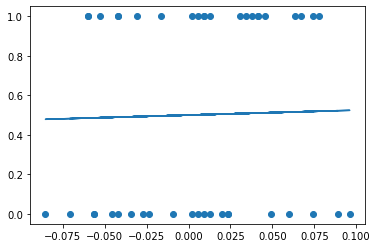

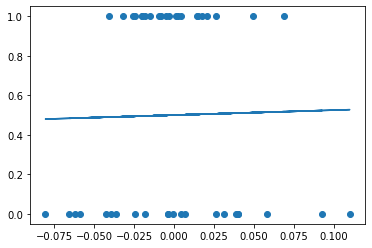

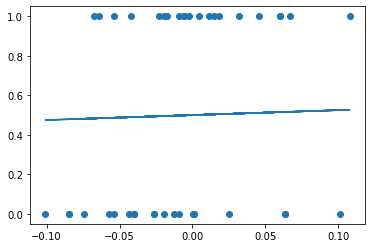

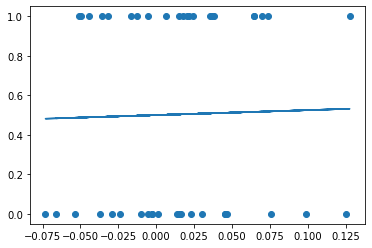

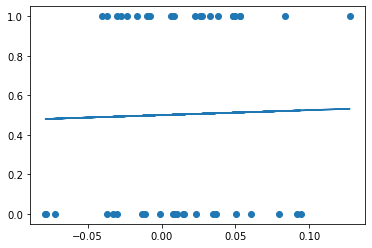

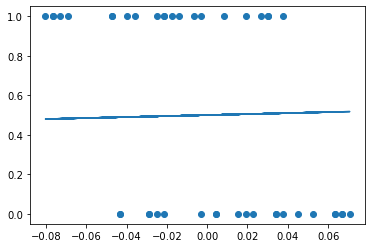

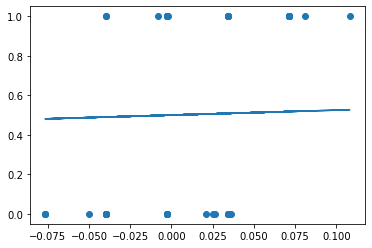

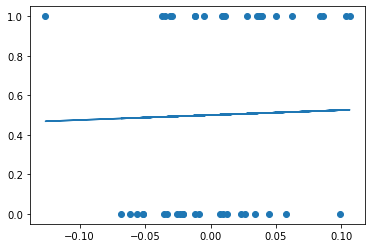

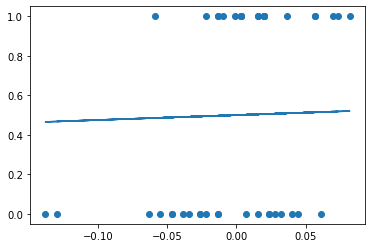

In [94]:
#lets graph it

def lline(x):
    return 1/(1+np.exp(-x))
def draw(clf,test_example,test_y):
    line = lline(test_example)
    clf.predict(test_example)
    plt.figure()
    plt.clf()
    plt.scatter(test_example,test_y)
    plt.plot(test_example,line)
#draw(clf,test_example,test_y)
for i in range(0,9):
    clf ,test_example = fitit(train_y,train_x,i)
    draw(clf,test_example,test_y)
    print('with the',i,'th column, the score is', clf.score(test_example, test_y))
# all of them are kind of bad